# TimeGAN Tutorial

## Time-series Generative Adversarial Networks

- Paper: Jinsung Yoon, Daniel Jarrett, Mihaela van der Schaar, "Time-series Generative Adversarial Networks," Neural Information Processing Systems (NeurIPS), 2019.

- Paper link: https://papers.nips.cc/paper/8789-time-series-generative-adversarial-networks

- Last updated Date: April 24th 2020

- Code author: Jinsung Yoon (jsyoon0823@gmail.com)

This notebook describes the user-guide of a time-series synthetic data generation application using timeGAN framework. We use Stock, Energy, and Sine dataset as examples.

### Prerequisite
Clone https://github.com/jsyoon0823/timeGAN.git to the current directory.

## Necessary packages and functions call

- timegan: Synthetic time-series data generation module
- data_loading: 2 real datasets and 1 synthetic datasets loading and preprocessing
- metrics: 
    - discriminative_metrics: classify real data from synthetic data
    - predictive_metrics: train on synthetic, test on real
    - visualization: PCA and tSNE analyses

In [9]:
## Necessary packages
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import warnings
warnings.filterwarnings("ignore")

# 1. TimeGAN model
from timegan import timegan
# 2. Data loading
from data_loading import real_data_loading, sine_data_generation
# 3. Metrics
from metrics.discriminative_metrics import discriminative_score_metrics
from metrics.predictive_metrics import predictive_score_metrics
from metrics.visualization_metrics import visualization

## Data Loading

Load original dataset and preprocess the loaded data.

- data_name: stock, energy, or sine
- seq_len: sequence length of the time-series data

In [10]:
## Data loading
data_name = 'traffic'
seq_len = 12

if data_name in ['stock', 'energy', 'traffic']:
  ori_data = real_data_loading(data_name, seq_len)
elif data_name == 'sine':
  # Set number of samples and its dimensions
  no, dim = 10000, 5
  ori_data = sine_data_generation(no, seq_len, dim)
    
print(data_name + ' dataset is ready.')

# data has following shape: (3661, 21, 6) = (no_samples - seq_len, seq_len, no_features (Close, Open,High,Low,Adj_Close,Volume)
# REMEMBER: Data was reordered, which means that the most recent values are up first

ori data shape: (28511, 11)
shape of sequence data: (28499, 12, 11)
traffic dataset is ready.


In [11]:
ori_data[0]

array([[0.06098901, 0.690012  , 0.        , 0.        , 0.01      ,
        0.54545455, 0.04347826, 0.        , 0.72727273, 0.        ,
        0.        ],
       [0.04766484, 0.68686263, 0.        , 0.        , 0.01      ,
        0.54545455, 0.08695652, 0.        , 0.72727273, 0.        ,
        0.        ],
       [0.0489011 , 0.68011398, 0.00714286, 0.        , 0.01      ,
        0.54545455, 0.13043478, 0.66666667, 0.36363636, 0.        ,
        0.        ],
       [0.12857143, 0.67006599, 0.        , 0.        , 0.01      ,
        0.54545455, 0.17391304, 0.        , 0.72727273, 0.        ,
        0.        ],
       [0.39642857, 0.66706659, 0.        , 0.        , 0.01      ,
        0.54545455, 0.2173913 , 0.        , 0.72727273, 0.        ,
        0.        ],
       [0.7885989 , 0.65971806, 0.        , 0.        , 0.01      ,
        0.54545455, 0.26086957, 0.        , 0.72727273, 0.        ,
        0.        ],
       [0.86002747, 0.66271746, 0.        , 0.        , 0.

## Set network parameters

TimeGAN network parameters should be optimized for different datasets.

- module: gru, lstm, or lstmLN
- hidden_dim: hidden dimensions
- num_layer: number of layers
- iteration: number of training iterations
- batch_size: the number of samples in each batch

In [12]:
## Newtork parameters
parameters = dict()

parameters['module'] = 'gru' 
parameters['hidden_dim'] = 24
parameters['num_layer'] = 3
parameters['iterations'] = 10000
parameters['batch_size'] = 128

In [13]:
print(f'Module: {parameters["module"]}')

Module: gru


## Run TimeGAN for synthetic time-series data generation

TimeGAN uses the original data and network parameters to return the generated synthetic data.

In [14]:
# Run TimeGAN
generated_data = timegan(ori_data, parameters)   
print('Finish Synthetic Data Generation, Saving generated data...')

### Save Data
generated_data = np.array(generated_data)
print(f'first element of generated data: {generated_data[0]}')

no, seq_length, dim = generated_data.shape
data_to_save = generated_data.reshape(no, seq_length*dim)

np.savetxt(f'data_{no}_{seq_length}_{dim}_{parameters["module"]}.csv', data_to_save, delimiter=',')
print('Data saved successfully!')


### Load Data
loaded_generated_data = np.loadtxt(f'data_{no}_{seq_length}_{dim}_{parameters["module"]}.csv', delimiter=',')
loaded_generated_data = loaded_generated_data.reshape(no, seq_length, dim)

print(f'First element of generated data after loading: {loaded_generated_data[0]}')

2024-07-23 12:46:55.329609: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: NVIDIA TITAN RTX major: 7 minor: 5 memoryClockRate(GHz): 1.77
pciBusID: 0000:63:00.0
2024-07-23 12:46:55.333030: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 1 with properties: 
name: NVIDIA TITAN RTX major: 7 minor: 5 memoryClockRate(GHz): 1.77
pciBusID: 0000:66:00.0
2024-07-23 12:46:55.336578: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 2 with properties: 
name: NVIDIA GeForce RTX 2080 Ti major: 7 minor: 5 memoryClockRate(GHz): 1.545
pciBusID: 0000:3e:00.0
2024-07-23 12:46:55.340019: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 3 with properties: 
name: NVIDIA GeForce RTX 2080 Ti major: 7 minor: 5 memoryClockRate(GHz): 1.545
pciBusID: 0000:40:00.0
2024-07-23 12:46:55.343620: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 4 with properties: 
name: NVIDIA GeForce RTX

Start Embedding Network Training
step: 0/10000, e_loss: 0.3827
step: 1000/10000, e_loss: 0.1387
step: 2000/10000, e_loss: 0.0925
step: 3000/10000, e_loss: 0.0699
step: 4000/10000, e_loss: 0.06
step: 5000/10000, e_loss: 0.0558
step: 6000/10000, e_loss: 0.045
step: 7000/10000, e_loss: 0.045
step: 8000/10000, e_loss: 0.0418
step: 9000/10000, e_loss: 0.0368
Finish Embedding Network Training
Start Training with Supervised Loss Only
step: 0/10000, s_loss: 0.269
step: 1000/10000, s_loss: 0.1118
step: 2000/10000, s_loss: 0.1053
step: 3000/10000, s_loss: 0.1019
step: 4000/10000, s_loss: 0.1065
step: 5000/10000, s_loss: 0.1008
step: 6000/10000, s_loss: 0.1034
step: 7000/10000, s_loss: 0.1029
step: 8000/10000, s_loss: 0.1005
step: 9000/10000, s_loss: 0.1022
Finish Training with Supervised Loss Only
Start Joint Training
step: 0/10000, d_loss: 2.1989, g_loss_u: 0.6118, g_loss_s: 0.1028, g_loss_v: 0.4439, e_loss_t0: 0.093
step: 1000/10000, d_loss: 1.4005, g_loss_u: 1.0582, g_loss_s: 0.0942, g_loss_v

In [15]:
loaded_generated_data.shape, generated_data.shape, np.array(ori_data).shape

((28499, 12, 11), (28499, 12, 11), (28499, 12, 11))

## Evaluate the generated data

### 1. Discriminative score

To evaluate the classification accuracy between original and synthetic data using post-hoc RNN network. The output is |classification accuracy - 0.5|.

- metric_iteration: the number of iterations for metric computation.

In [16]:
metric_iteration = 5

discriminative_score = list()
for _ in range(metric_iteration):
  temp_disc = discriminative_score_metrics(ori_data, generated_data)
  discriminative_score.append(temp_disc)

print('Discriminative score: ' + str(np.round(np.mean(discriminative_score), 4)))

2024-07-23 14:52:53.299349: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: NVIDIA TITAN RTX major: 7 minor: 5 memoryClockRate(GHz): 1.77
pciBusID: 0000:63:00.0
2024-07-23 14:52:53.303359: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 1 with properties: 
name: NVIDIA TITAN RTX major: 7 minor: 5 memoryClockRate(GHz): 1.77
pciBusID: 0000:66:00.0
2024-07-23 14:52:53.307257: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 2 with properties: 
name: NVIDIA GeForce RTX 2080 Ti major: 7 minor: 5 memoryClockRate(GHz): 1.545
pciBusID: 0000:3e:00.0
2024-07-23 14:52:53.310763: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 3 with properties: 
name: NVIDIA GeForce RTX 2080 Ti major: 7 minor: 5 memoryClockRate(GHz): 1.545
pciBusID: 0000:40:00.0
2024-07-23 14:52:53.314676: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 4 with properties: 
name: NVIDIA GeForce RTX

Discriminative score: 0.4086


## Evaluate the generated data

### 2. Predictive score

To evaluate the prediction performance on train on synthetic, test on real setting. More specifically, we use Post-hoc RNN architecture to predict one-step ahead and report the performance in terms of MAE.

In [17]:
predictive_score = list()
for tt in range(metric_iteration):
  temp_pred = predictive_score_metrics(ori_data, generated_data)
  predictive_score.append(temp_pred)   
    
print('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)))

2024-07-23 14:58:05.647375: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: NVIDIA TITAN RTX major: 7 minor: 5 memoryClockRate(GHz): 1.77
pciBusID: 0000:63:00.0
2024-07-23 14:58:05.650932: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 1 with properties: 
name: NVIDIA TITAN RTX major: 7 minor: 5 memoryClockRate(GHz): 1.77
pciBusID: 0000:66:00.0
2024-07-23 14:58:05.654416: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 2 with properties: 
name: NVIDIA GeForce RTX 2080 Ti major: 7 minor: 5 memoryClockRate(GHz): 1.545
pciBusID: 0000:3e:00.0
2024-07-23 14:58:05.658319: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 3 with properties: 
name: NVIDIA GeForce RTX 2080 Ti major: 7 minor: 5 memoryClockRate(GHz): 1.545
pciBusID: 0000:40:00.0
2024-07-23 14:58:05.661854: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 4 with properties: 
name: NVIDIA GeForce RTX

Predictive score: 0.0016


## Evaluate the generated data

### 3. Visualization

We visualize the original and synthetic data distributions using PCA and tSNE analysis.

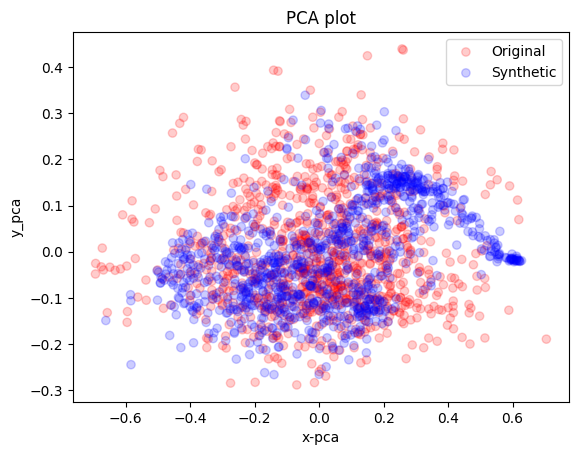

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.003s...
[t-SNE] Computed neighbors for 2000 samples in 0.115s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.055523
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.867035
[t-SNE] KL divergence after 300 iterations: 1.171242


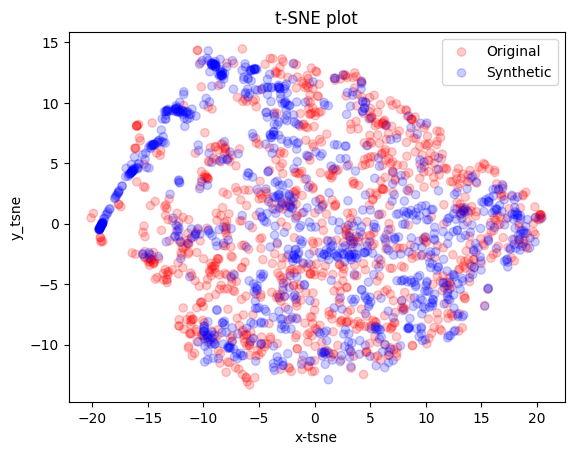

In [18]:
visualization(ori_data, generated_data, 'pca')
visualization(ori_data, generated_data, 'tsne')